# Importing required libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns

### taking sample size of 50k for visualization

In [30]:
sample_size = 50000

# Reading data

In [31]:
data = pd.read_csv("../input/restaurant-recommendation-challenge/train_full.csv")
data = data.sample(sample_size)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
orders =pd.read_csv("../input/restaurant-recommendation-challenge/orders.csv")
orders = orders.sample(sample_size)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
vendors = pd.read_csv("../input/restaurant-recommendation-challenge/vendors.csv")


# Data Insights

In [34]:
data.head()

,customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,...,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
4695551,0DC0XAI,Male,1,1,2019-12-03 18:11:48,2019-12-03 18:11:59,0,NaN,-1.19000,-0.1158,...,1.0,1.0,2019-03-26 23:11:58,2020-04-06 14:56:36,3,1,0,207,0DC0XAI X 0 X 207,0
5247558,T2UG7BH,NaN,1,1,2020-01-28 14:01:24,2020-01-28 14:02:22,0,NaN,0.21780,0.5210,...,1.0,1.0,2019-05-12 17:17:13,2020-04-05 18:12:28,3,1,0,250,T2UG7BH X 0 X 250,0
4177304,PX5JXDA,Male,1,1,2019-10-13 03:00:18,2019-11-16 17:09:23,0,Home,0.01192,0.6533,...,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,PX5JXDA X 0 X 28,0
2369923,34UOGHM,Female,1,1,2019-04-08 19:12:25,2019-04-08 19:12:25,0,Home,2.49200,-78.9000,...,1.0,1.0,2018-10-18 21:01:20,2020-04-03 22:28:50,3,1,0,104,34UOGHM X 0 X 104,0
2529162,BFRZKSV,Male,1,1,2019-05-02 01:03:29,2019-05-02 01:03:29,1,Home,-0.72600,0.7970,...,1.0,1.0,2019-05-31 14:33:35,2020-04-06 19:57:22,3,1,1,274,BFRZKSV X 1 X 274,0


In [35]:
orders.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
42374,216673.0,HX76ORD,4.0,27.2,3,NaN,0.0,NaN,No,No,...,NaN,NaN,NaN,NaN,NaN,159,2019-10-10 21:21:39,2,NaN,HX76ORD X 2 X 159
23413,159195.0,DRNO1MX,5.0,26.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-25 05:30:00,85,2019-07-25 23:46:04,0,Home,DRNO1MX X 0 X 85
101515,336410.0,FYJHG14,1.0,25.2,1,NaN,0.0,0.0,No,No,...,2020-01-17 22:09:27,2020-01-17 21:23:23,2020-01-17 22:27:38,2020-01-17 22:28:48,NaN,845,2020-01-17 21:22:36,1,NaN,FYJHG14 X 1 X 845
50075,233396.0,7WHHS16,3.0,36.2,1,NaN,0.0,NaN,No,No,...,NaN,2019-10-23 16:43:38,2019-10-23 21:02:24,2019-10-23 21:33:05,NaN,105,2019-10-23 20:40:20,1,NaN,7WHHS16 X 1 X 105
24062,160556.0,B12Z3SB,2.0,4.6,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-28 05:30:00,195,2019-07-28 17:03:19,0,Home,B12Z3SB X 0 X 195


In [36]:
vendors.head()

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders
0,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1
1,13,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,...,1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1
2,20,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,...,1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1
3,23,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,...,1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1
4,28,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,...,1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1


In [37]:
data.describe()

,status_x,verified_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_id,...,rank,vendor_rating,open_close_flags,country_id,city_id,device_type,display_orders,location_number_obj,id_obj,target
count,50000.000000,50000.000000,50000.000000,49996.000000,49996.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.000000,50000.0,50000.000000,50000.000000,50000.000000
mean,0.999180,0.970740,0.743760,2.215304,-25.565291,289.824480,120056.846700,2.091066,0.852591,2.112720,...,9.882000,4.348612,1.0,1.0,1.0,2.977800,1.0,0.743760,289.824480,0.013640
std,0.028624,0.168536,1.350858,24.571588,37.098795,241.124858,3501.180447,21.571681,4.607023,0.316253,...,3.151234,0.247934,0.0,0.0,0.0,0.209542,0.0,1.350858,241.124858,0.115992
min,0.000000,0.000000,0.000000,-1038.000000,-134.400000,4.000000,118597.000000,-1.787000,-1.449000,2.000000,...,1.000000,3.200000,1.0,1.0,1.0,1.000000,1.0,0.000000,4.000000,0.000000
25%,1.000000,1.000000,0.000000,-0.508075,-78.500000,106.000000,118703.000000,-0.807000,0.081360,2.000000,...,11.000000,4.200000,1.0,1.0,1.0,3.000000,1.0,0.000000,106.000000,0.000000
50%,1.000000,1.000000,0.000000,-0.090670,0.007288,203.000000,118802.000000,-0.494600,0.527300,2.000000,...,11.000000,4.400000,1.0,1.0,1.0,3.000000,1.0,0.000000,203.000000,0.000000
75%,1.000000,1.000000,1.000000,0.261050,0.510000,391.000000,118994.000000,0.015630,0.646000,2.000000,...,11.000000,4.500000,1.0,1.0,1.0,3.000000,1.0,1.000000,391.000000,0.000000
max,1.000000,1.000000,29.000000,453.800000,45.340000,907.000000,132953.000000,205.200000,44.220000,3.000000,...,11.000000,4.800000,1.0,1.0,1.0,3.000000,1.0,29.000000,907.000000,1.000000


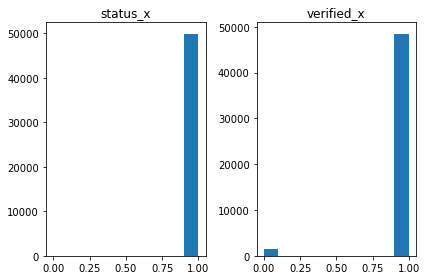

In [38]:
# Visualising status_x and verified_X
data[['status_x','verified_x']].hist(grid=False)
plt.tight_layout()

plt.show()

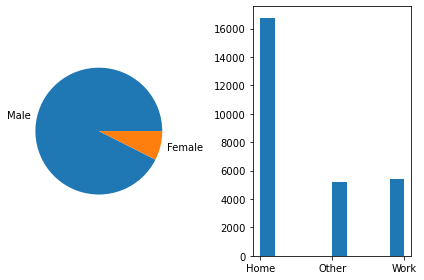

In [39]:
#Plotting distribution of gender and location_type

fig,ax= plt.subplots(1, 2)
ax[0].pie(data.gender.value_counts(),labels=['Male','Female'])
data['location_type'].hist(ax=ax[1],grid=False)
plt.tight_layout()
plt.show()

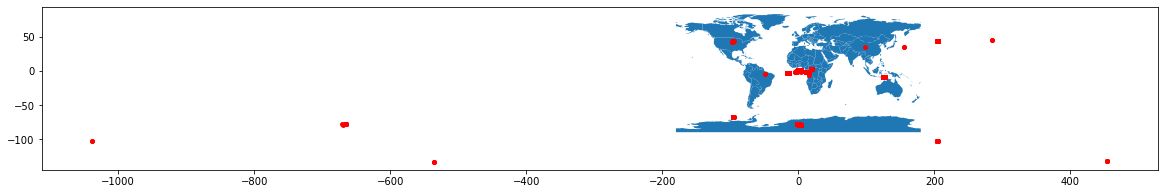

In [40]:
# plotting lattitudes and longitudes of customers data

df = data[["latitude_x","longitude_x"]]

geometry = [Point(xy) for xy in zip(df['latitude_x'], df['longitude_x'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20,10)), marker='o', color='red', markersize=15);

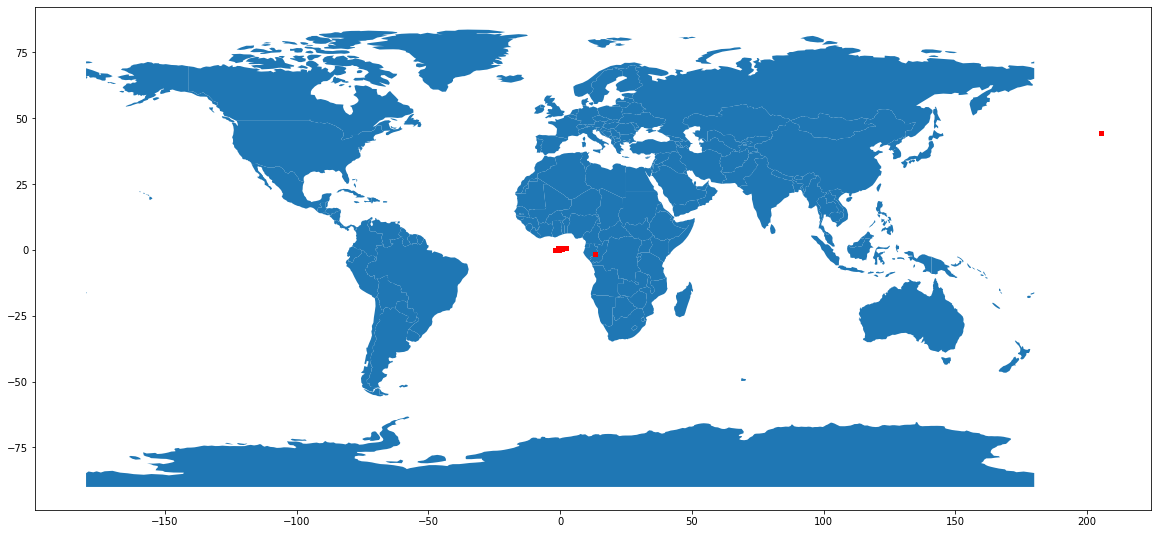

In [41]:
#Plotting lattitude and longitude of vendors data

df = data[["latitude_y","longitude_y"]]

geometry = [Point(xy) for xy in zip(df['latitude_y'], df['longitude_y'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20,10)), marker='o', color='red', markersize=15);

In [42]:
data.location_number.unique()

array([ 0,  1,  2,  5,  4,  3,  7,  9,  8,  6, 24, 12, 11, 10, 16, 28, 25,
       15, 13, 22, 23, 14, 18, 20, 21, 19, 29, 27, 17])

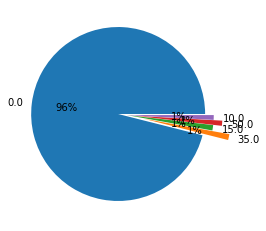

In [43]:
#Discount given by vendors

plt.pie(data.discount_percentage.value_counts(),labels=data.discount_percentage.unique(),autopct='%1.0f%%',explode=[0.1,0.2,0,0.1,0])
plt.show()

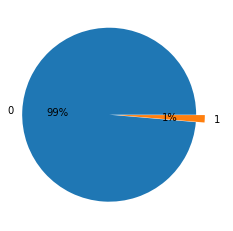

In [44]:
#Target distribution

plt.pie(data.target.value_counts(),labels=data.target.unique(),autopct='%1.0f%%',explode=[0.1,0])
plt.show()

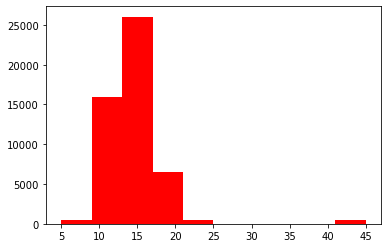

In [45]:
data['prepration_time'].hist(color='red')
plt.grid(False)

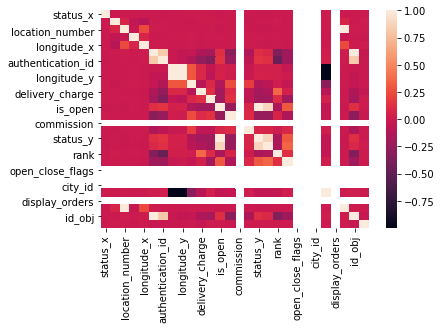

In [46]:
# corelation matrix of training data
sns.heatmap(data.corr())

In [47]:
orders.describe()

,akeed_order_id,item_count,grand_total,payment_mode,vendor_discount_amount,promo_code_discount_percentage,vendor_rating,driver_rating,deliverydistance,preparationtime,vendor_id,LOCATION_NUMBER
count,49969.000000,47431.000000,50000.000000,50000.000000,50000.00000,24328.000000,16865.000000,50000.000000,50000.000000,29446.000000,50000.000000,50000.000000
mean,265226.434309,2.410322,15.435112,1.348720,0.00109,0.027540,1.970768,0.686900,4.112658,43.201963,239.270460,0.868820
std,85332.479244,1.658349,12.560116,0.766215,0.06086,0.826841,2.316442,1.679073,4.381659,7.117451,226.166094,1.235104
min,11049.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,25.000000,4.000000,0.000000
25%,190760.000000,1.000000,8.200000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,40.000000,84.000000,0.000000
50%,266969.000000,2.000000,11.700000,1.000000,0.00000,0.000000,0.000000,0.000000,2.890000,45.000000,154.000000,0.000000
75%,336667.000000,3.000000,18.500000,1.000000,0.00000,0.000000,5.000000,0.000000,7.950000,45.000000,299.000000,1.000000
max,415508.000000,41.000000,281.600000,5.000000,10.65000,25.000000,5.000000,5.000000,19.810000,90.000000,907.000000,23.000000


In [48]:
orders.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
42374,216673.0,HX76ORD,4.0,27.2,3,NaN,0.0,NaN,No,No,...,NaN,NaN,NaN,NaN,NaN,159,2019-10-10 21:21:39,2,NaN,HX76ORD X 2 X 159
23413,159195.0,DRNO1MX,5.0,26.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-25 05:30:00,85,2019-07-25 23:46:04,0,Home,DRNO1MX X 0 X 85
101515,336410.0,FYJHG14,1.0,25.2,1,NaN,0.0,0.0,No,No,...,2020-01-17 22:09:27,2020-01-17 21:23:23,2020-01-17 22:27:38,2020-01-17 22:28:48,NaN,845,2020-01-17 21:22:36,1,NaN,FYJHG14 X 1 X 845
50075,233396.0,7WHHS16,3.0,36.2,1,NaN,0.0,NaN,No,No,...,NaN,2019-10-23 16:43:38,2019-10-23 21:02:24,2019-10-23 21:33:05,NaN,105,2019-10-23 20:40:20,1,NaN,7WHHS16 X 1 X 105
24062,160556.0,B12Z3SB,2.0,4.6,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-28 05:30:00,195,2019-07-28 17:03:19,0,Home,B12Z3SB X 0 X 195


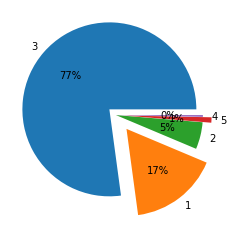

In [49]:
# Modes pf payment used
plt.pie(orders.payment_mode.value_counts(),labels=orders.payment_mode.unique(),autopct='%1.0f%%',explode=[0.1,0.2,0,0.1,0])

plt.show()

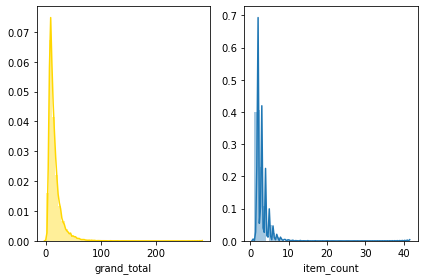

In [50]:
# Distribution of numerical features
fig, ax = plt.subplots(1, 2)
sns.distplot(orders['grand_total'], ax=ax[0], color='gold')
sns.distplot(orders['item_count'], ax=ax[1])
plt.tight_layout()
plt.show()

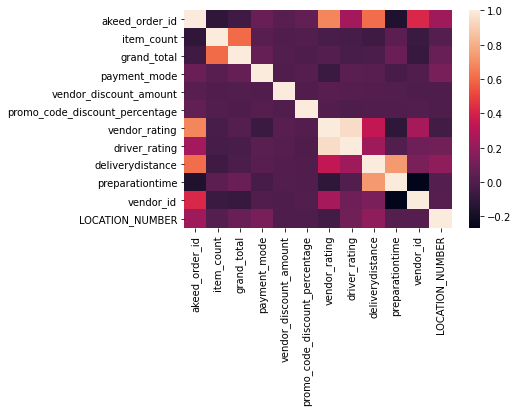

In [51]:
sns.heatmap(orders.corr())
plt.show()

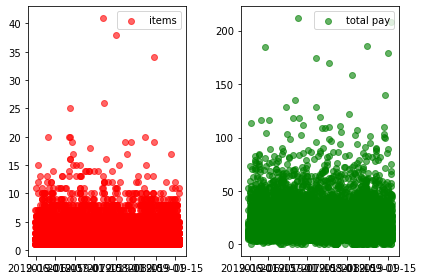

In [52]:
# scatter plot of payment and items

fig, ax = plt.subplots(1, 2)
orders['delivery_date'] = pd.to_datetime(orders['delivery_date'])
ax[0].scatter(orders.set_index('delivery_date').index, orders['item_count'], 
              label='items', alpha=0.6, color='red')
ax[0].legend()

ax[1].scatter(orders.set_index('delivery_date').index, orders['grand_total'], 
              label='total pay', alpha=0.6, color='green')
ax[1].legend()
plt.tight_layout()
plt.show()

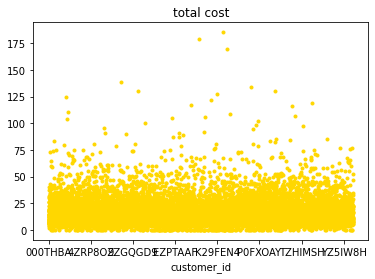

In [53]:
orders.groupby('customer_id').mean()['grand_total'].plot(marker='.', linestyle='none', color='gold')
plt.title('total cost');

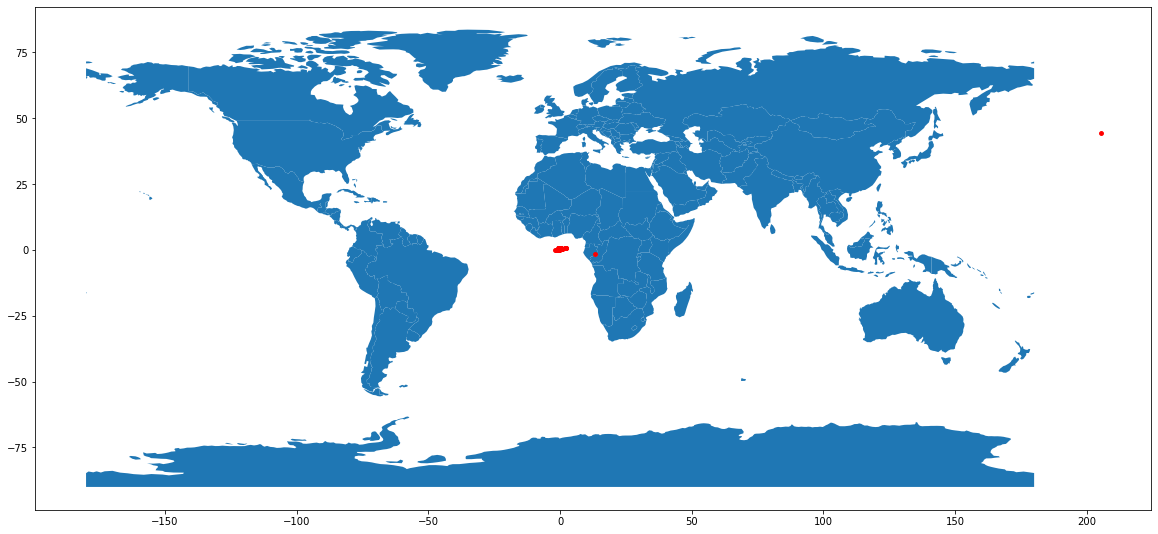

In [54]:
df = vendors[["latitude","longitude"]]

geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20,10)), marker='o', color='red', markersize=15);

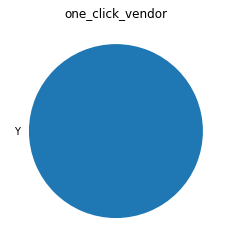

In [55]:
plt.title("one_click_vendor")
plt.pie(vendors.one_click_vendor.value_counts(),labels='Y')
plt.show()

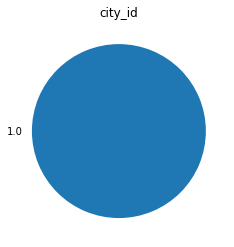

In [56]:
plt.title("city_id")
plt.pie(vendors.city_id.value_counts(),labels=["1.0"])
plt.show()